alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


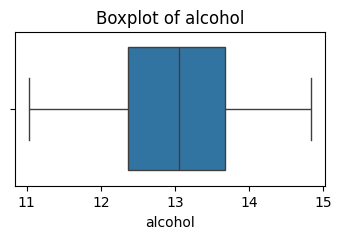

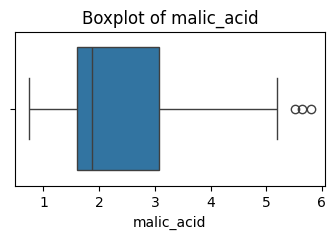

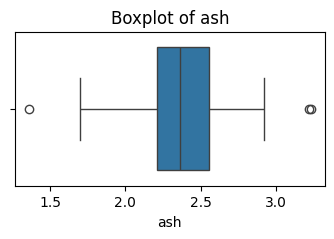

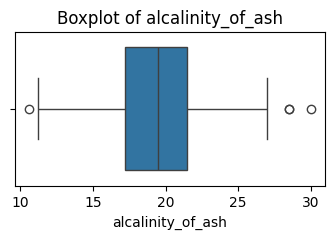

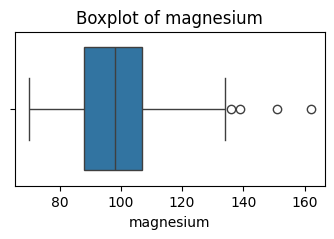

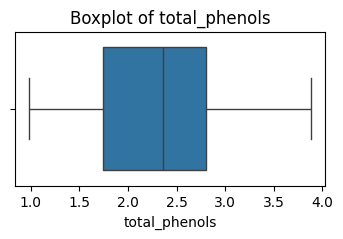

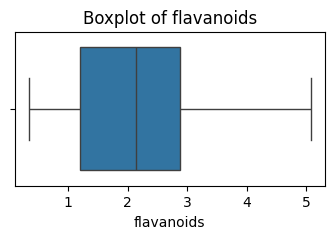

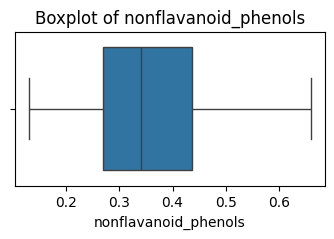

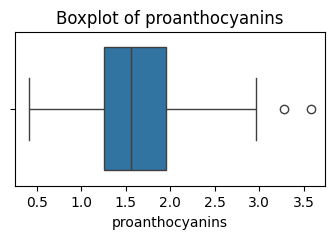

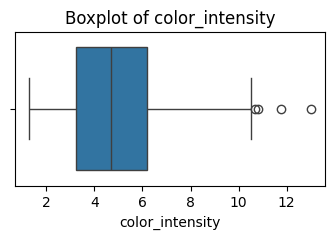

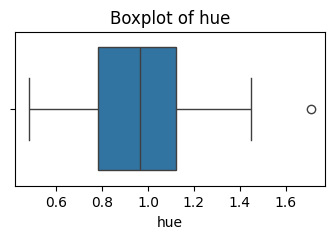

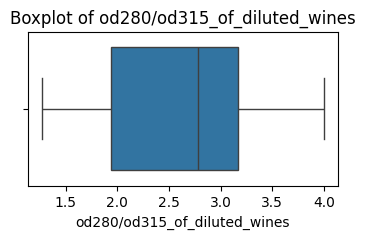

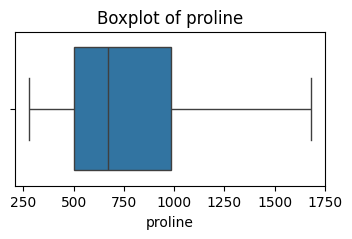

                         Feature       VIF
0                        alcohol  2.460372
1                     malic_acid  1.656647
2                            ash  2.185448
3              alcalinity_of_ash  2.238732
4                      magnesium  1.417855
5                  total_phenols  4.334519
6                     flavanoids  7.029350
7           nonflavanoid_phenols  1.796380
8                proanthocyanins  1.975683
9                color_intensity  3.026304
10                           hue  2.551447
11  od280/od315_of_diluted_wines  3.785473
12                       proline  2.823849
                         Feature       VIF
0                        alcohol  2.460372
1                     malic_acid  1.656647
2                            ash  2.185448
3              alcalinity_of_ash  2.238732
4                      magnesium  1.417855
5                  total_phenols  4.334519
6                     flavanoids  7.029350
7           nonflavanoid_phenols  1.796380
8          

In [ ]:
#実践11-1: (予備) VIFの計算
'''以下のデータを読み込んでください。
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target
各変数の特徴（含む欠損・外れ値）を可視化や数値計算等で確認してください。必要に応じて加工してください。
標準化をしてください。
（応用：可能であれば）多重共線性を確認し、必要に応じて変数を削除してください。その結果でモデルを変更してください。ヒント: statsmodelのvariance_inflation_factorを用いてVIFを算出する。
回帰モデルを作成してください。
推論結果を確認してください。その際、以下の確認をしてください。
決定係数 (R^2)
RMSE'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# データの読み込み
data = load_wine(as_frame=True)
X = data.data
y = data.target

# データフレームの結合
df = pd.concat([X, y], axis=1)

# 欠損値の確認
print(df.isnull().sum())

# 各特徴量の分布確認
for column in df.columns[:-1]:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIFの計算
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# VIFの表示
#10を超えたら
X_vif = pd.DataFrame(X_scaled, columns=X.columns)
vif = calculate_vif(X_vif)
print(vif)

# VIFが高い変数を削除する
high_vif_features = vif[vif["VIF"] > 10]["Feature"].tolist()
X_vif_dropped = X_vif.drop(columns=high_vif_features)

# 再度VIFを計算して確認
vif_dropped = calculate_vif(X_vif_dropped)
print(vif_dropped)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X_vif_dropped, y, test_size=0.2, random_state=42)

# 回帰モデルの作成
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 決定係数 (R^2)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
                         Feature       VIF
0                        alcohol  2.460372
1                     malic_acid  1.656647
2                            ash  2.185448
3              alcalinity_of_ash  2.238732
4                      magnesium  1.417855
5                  total_phenols  4.334519
6                     flavanoids  7.029350
7           nonflavanoid_phenols  1.796380
8                proanthocyanins  1.975683
9                color_intensity  3.026304
10                           hue  2.55

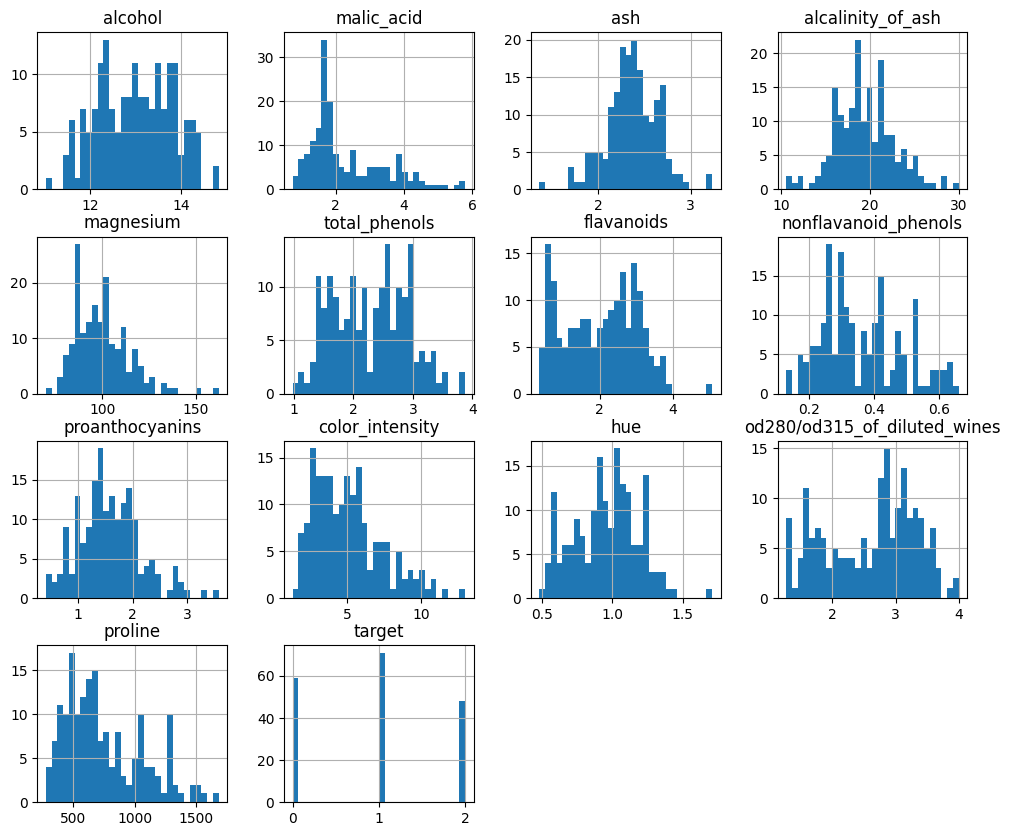

In [ ]:
#実践11-1:  VIFの計算
'''以下のデータを読み込んでください。
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target
各変数の特徴（含む欠損・外れ値）を可視化や数値計算等で確認してください。必要に応じて加工してください。
標準化をしてください。
（応用：可能であれば）多重共線性を確認し、必要に応じて変数を削除してください。その結果でモデルを変更してください。ヒント: statsmodelのvariance_inflation_factorを用いてVIFを算出する。
回帰モデルを作成してください。
推論結果を確認してください。その際、以下の確認をしてください。
決定係数 (R^2)
RMSE'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# データの読み込み
data = load_wine(as_frame=True)
X = data.data
y = data.target

# データフレームの結合
df = pd.concat([X, y], axis=1)

# 欠損値の確認
print(df.isnull().sum())

# 各特徴量の分布確認
df.hist(bins=30, figsize=(12, 10))

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIFの計算
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# VIFの表示
X_vif = pd.DataFrame(X_scaled, columns=X.columns)
vif = calculate_vif(X_vif)
print(vif)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=3)

# 回帰モデルの作成
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 決定係数 (R^2)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


In [ ]:
#実践11-2 (応用)：LinearRegression(正規化)
'''標準化以外の代表的な変換について調べ、標準化(StandardScaler)との違いを記載してください。
上記実践1と同じ問題で別の変換手法を用いて評価してください。'''

#代表的な変換手法
'''

1.標準化（StandardScaler）
特徴: データを平均0、標準偏差1にスケール。
メリット: データのスケールが異なる場合でも同じ基準で比較できる。
デメリット: 外れ値に敏感。

2.正規化（MinMaxScaler）
特徴: データを指定された範囲（通常0から1）にスケール。
メリット: 特定の範囲にデータを収めることができ、外れ値の影響が少ない。
デメリット: 外れ値があると範囲が広がりすぎる可能性がある。

3.ロバストスケーリング（RobustScaler）
特徴: 中央値を0、四分位範囲を1にスケール。
メリット: 外れ値の影響を受けにくい。
デメリット: データの中央部分が中心となるため、極端な値が見えにくい。

4.正規分布変換（PowerTransformer, QuantileTransformer）
特徴: データを正規分布に近づけるように変換。
メリット: 正規分布を仮定するモデルに適している。
デメリット: 元のデータの分布が大きく変わる可能性がある。'''

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# データの読み込み
data = load_wine(as_frame=True)
X = data.data
y = data.target

# 正規化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=3)

# 回帰モデルの作成
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 決定係数 (R^2)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R^2: 0.8714659814845567
RMSE: 0.27924100954332404


In [ ]:
#実践11-3(応用):Ridge, Lasso, ElasticNe
'''11-1と同じデータに対してRidge, Lasso, ElasticNetを適用して評価してください'''


import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# データの読み込み
data = load_wine(as_frame=True)
X = data.data
y = data.target

# 正規化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=3)

# Ridge回帰
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# 評価
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Ridge R^2:", ridge_r2)
print("Ridge RMSE:", ridge_rmse)

# Lasso回帰
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# 評価
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("Lasso R^2:", lasso_r2)
print("Lasso RMSE:", lasso_rmse)

# ElasticNet回帰
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)

# 評価
elastic_net_r2 = r2_score(y_test, elastic_net_pred)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_pred))

print("ElasticNet R^2:", elastic_net_r2)
print("ElasticNet RMSE:", elastic_net_rmse)


Ridge R^2: 0.8714125568250927
Ridge RMSE: 0.27929903622819946
Lasso R^2: -0.06840022611645025
Lasso RMSE: 0.8050764858994133
ElasticNet R^2: 0.15658872164568982
ElasticNet RMSE: 0.715302690782437
